In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats

In [2]:
import psycopg2
from psycopg2 import Error

In [3]:
try:
    # Connect to an existing database
    connection = psycopg2.connect(user="postgres",
                                  password="Pung",
                                  host="127.0.0.1",
                                  port="5432",
                                  database="InChannel0629")

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    print("PostgreSQL server information")
    print(connection.get_dsn_parameters(), "\n")
    # Executing a SQL query
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
    
    def create_pandas_table(sql_query, database = connection):
        table = pd.read_sql_query(sql_query, database)
        return table

    policies = create_pandas_table("SELECT * FROM policies")
    
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL server information
{'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'InChannel0629', 'host': '127.0.0.1', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 13.3 on x86_64-apple-darwin, compiled by Apple clang version 11.0.3 (clang-1103.0.32.59), 64-bit',) 

PostgreSQL connection is closed


In [4]:
policies.shape

(892405, 6)

In [5]:
policies.head()

,short_channel_id,direction,base_fee_millisatoshi,fee_per_millionth,delay,update_time
0,505149x622x0,1,1000.0,10.0,14,2019-07-15 08:33:54
1,505149x622x0,0,1000.0,10.0,14,2019-08-08 16:52:22
2,513675x2245x0,1,1000.0,10.0,14,2019-03-18 04:23:01
3,513675x2245x0,0,1000.0,1.0,144,2019-08-17 03:10:02
4,513887x1177x0,1,1000.0,1.0,144,2018-03-20 06:01:56


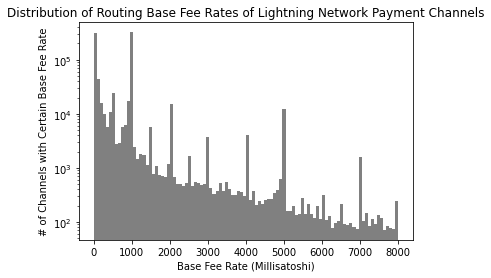

In [12]:
plt.hist(policies['base_fee_millisatoshi'], 
         100, 
         range=[0, 8000], 
         facecolor='gray', 
         align='mid')
plt.title('Distribution of Routing Base Fee Rates of Lightning Network Payment Channels')
plt.yscale('log')
plt.ylabel('# of Channels with Certain Base Fee Rate')
plt.xlabel('Base Fee Rate (Millisatoshi)')
plt.show()

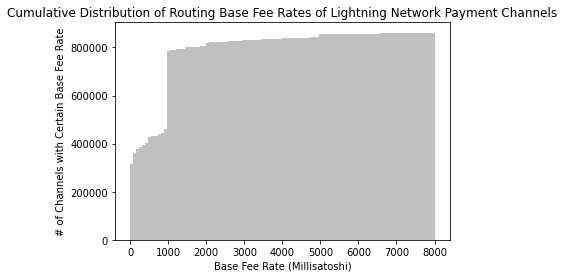

In [42]:
plt.hist(policies['base_fee_millisatoshi'], 
         100, 
         range=[0, 8000], 
         facecolor='gray', 
         alpha=.5,
         cumulative=True)
plt.title('Cumulative Distribution of Routing Base Fee Rates of Lightning Network Payment Channels')
#plt.yscale('log')
plt.ylabel('# of Channels with Certain Base Fee Rate')
plt.xlabel('Base Fee Rate (Millisatoshi)')
plt.show()

In [45]:
# Filtered data for only Direction = 1
policies_direction1 = policies[policies['direction'] == 1]

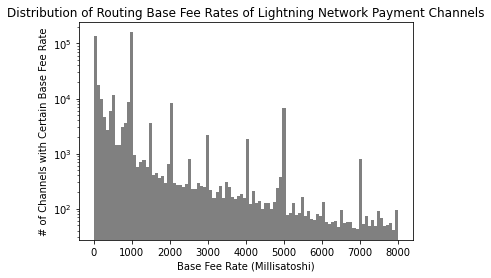

In [46]:
plt.hist(policies_direction1['base_fee_millisatoshi'], 
         100, 
         range=[0, 8000], 
         facecolor='gray', 
         align='mid')
plt.title('Distribution of Routing Base Fee Rates of Lightning Network Payment Channels')
plt.yscale('log')
plt.ylabel('# of Channels with Certain Base Fee Rate')
plt.xlabel('Base Fee Rate (Millisatoshi)')
plt.show()